<a href="https://colab.research.google.com/github/JefersonBiasim/SI-IFPR/blob/main/Atividade_1_SistemasInteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Atividade 01**
---


**Disciplina:** Sistemas Inteligentes<br>
**Nome:** Jeferson de Oliveira Biasim<br>
**Turma:** 8º Semestre - Sistemas de Informação


# **1 - Importação das bibliotecas**

In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import statistics  as sts
import numpy as np
from imblearn.under_sampling import NearMiss
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import (train_test_split, cross_val_score) 
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,classification_report)

# **2 - Analise Exploratória de Dados (AED)**

In [3]:
#Abrindo o documento via Google Drive
url = '/content/drive/MyDrive/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)

In [4]:
#Exibir os 5 primeiros registros
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
#Exibir a quantidade de linhas e colunas existentes do documento
df.shape

(5110, 12)

In [6]:
#Renomeando as colunas conforme a ordem
df.columns = ['id','genero', 'idade', 'hipertensao', 'doenca_cardiaca','casado','tp_trabalho','tp_residencia','nivel_glicose','imc','tp_fumante','avc']

In [7]:
#Exibindo o nome de todas as colunas alteradas
df.columns

Index(['id', 'genero', 'idade', 'hipertensao', 'doenca_cardiaca', 'casado',
       'tp_trabalho', 'tp_residencia', 'nivel_glicose', 'imc', 'tp_fumante',
       'avc'],
      dtype='object')

In [8]:
#Exibe os 5 primeiros e os 5 últimos registros
display(df)

,id,genero,idade,hipertensao,doenca_cardiaca,casado,tp_trabalho,tp_residencia,nivel_glicose,imc,tp_fumante,avc
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
#Exibe as estatísticas de cada coluna como quantidade, valor mínimo e máximo,
df.describe()

,id,idade,hipertensao,doenca_cardiaca,nivel_glicose,imc,avc
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
#Exibe os registros nulos de cada coluna, no exemplo existe uma coluna com valores nulos, será tratado mais pra frente
df.isnull().sum()

id                   0
genero               0
idade                0
hipertensao          0
doenca_cardiaca      0
casado               0
tp_trabalho          0
tp_residencia        0
nivel_glicose        0
imc                201
tp_fumante           0
avc                  0
dtype: int64

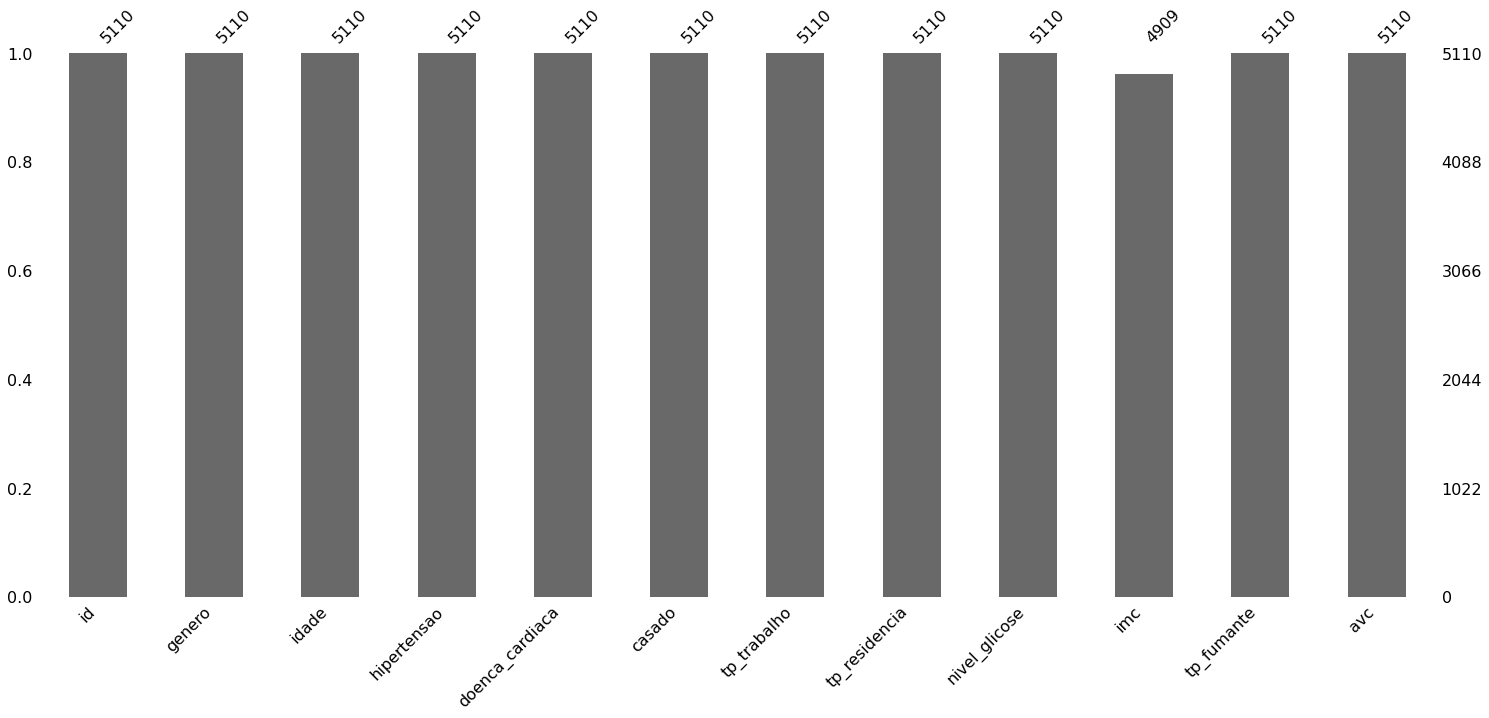

In [11]:
#Utilizando Missigno para representar a coluna com valores nulos
ax = msno.bar(df)

In [12]:
#Fazer o primeiro backup para iniciar o tratamento dos dados
df1 = df.copy()

In [13]:
#Utilizando groupby para ver se tem algum registro "estranho", será feito em todas as colunas
group = df1.groupby(['avc']).size()
group

avc
0    4861
1     249
dtype: int64

In [14]:
group = df1.groupby(['genero']).size()
group

genero
Female    2994
Male      2115
Other        1
dtype: int64

In [15]:
#No exemplo a coluna 'genero' tem 3 registros strings, para diferenciar será trocado em valores numéricos utilizando o recurso replace
df1['genero'].replace(['Female', 'Male', 'Other'], ['1', '2', '3'], inplace=True)

In [16]:
#Verificando se a troca afetou diretamente os registros
group = df1.groupby(['genero']).size()
group

genero
1    2994
2    2115
3       1
dtype: int64

In [17]:
group = df1.groupby(['idade']).size()
group

idade
0.08       2
0.16       3
0.24       5
0.32       5
0.40       2
        ... 
78.00    102
79.00     85
80.00     70
81.00     60
82.00     56
Length: 104, dtype: int64

In [18]:
group = df1.groupby(['hipertensao']).size()
group

hipertensao
0    4612
1     498
dtype: int64

In [19]:
group = df1.groupby(['doenca_cardiaca']).size()
group

doenca_cardiaca
0    4834
1     276
dtype: int64

In [20]:
group = df1.groupby(['casado']).size()
group

casado
No     1757
Yes    3353
dtype: int64

In [21]:
#Mesma situação do 'genero' contudo podemos usar a questão booleana, deixando 0 para No e 1 para Yes
df1['casado'].replace(['No', 'Yes'], ['0', '1'], inplace=True)

In [22]:
group = df1.groupby(['casado']).size()
group

casado
0    1757
1    3353
dtype: int64

In [23]:
#Nesta situação tem inúmeros atributos entretanto para o viés do trabalho esta coluna será removida, nada será tratado por ora
group = df1.groupby(['tp_trabalho']).size()
group

tp_trabalho
Govt_job          657
Never_worked       22
Private          2925
Self-employed     819
children          687
dtype: int64

In [24]:
#Mesma situação da coluna 'tp_trabalho'
group = df1.groupby(['tp_residencia']).size()
group

tp_residencia
Rural    2514
Urban    2596
dtype: int64

In [25]:
#Removendo as colunas 'id', 'tp_trabalho' e 'tp_residencia' pois não vai influenciar na análise futuramente
df1.drop(["id", "tp_trabalho", "tp_residencia"], axis=1, inplace=True)

In [26]:
group = df1.groupby(['nivel_glicose']).size()
group

nivel_glicose
55.12     1
55.22     1
55.23     1
55.25     1
55.26     1
         ..
266.59    1
267.60    1
267.61    1
267.76    1
271.74    1
Length: 3979, dtype: int64

In [27]:
group = df1.groupby(['imc']).size()
group

imc
10.3    1
11.3    1
11.5    1
12.0    1
12.3    1
       ..
66.8    1
71.9    1
78.0    1
92.0    1
97.6    1
Length: 418, dtype: int64

In [28]:
group = df1.groupby(['tp_fumante']).size()
group

tp_fumante
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
dtype: int64

In [34]:
#Na coluna 'tp_fumante' tem 4 atributos, mesmo sendo quase idênticos pode influenciar diretamente na análise, sendo assim será atribuído valores numéricos
#O atributo 'Unknown' será tratado como nulo e será tratado posteriormente
df1['tp_fumante'].replace(['formerly smoked', 'never smoked', 'smokes'], ['1', '2','3'], inplace=True)

In [35]:
#Neste código foi trocado todos os atributos de 'Unknown' para nulo
df1.replace('Unknown', np.nan, inplace = True)

In [36]:
#Tratamento de valores nulos para a coluna 'IMC', como Média não é feito para valores nulos será feito a alteração com a Mediana
mediana = sts.median(df1['imc'])
print(mediana)

45.75


In [37]:
#Com o fillna será trocando os valores nulos pela mediana
df1['imc'].fillna(mediana, inplace=True)

In [38]:
#Tratamento de valores nulos para a coluna 'tp_fumante', nesta situação será trocado pela Moda da coluna
moda = sts.mode(df1['tp_fumante'])
print(moda)

2


In [39]:
df1['tp_fumante'].fillna(moda, inplace=True)

In [40]:
#Analisando se todas as colunas estão ajustadas, se sim será feito o próximo passo
df1.isnull().sum()

genero             0
idade              0
hipertensao        0
doenca_cardiaca    0
casado             0
nivel_glicose      0
imc                0
tp_fumante         0
avc                0
dtype: int64

In [41]:
#Info é responsável por exibir a quantidade de registros e o tipo da variável
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genero           5110 non-null   object 
 1   idade            5110 non-null   float64
 2   hipertensao      5110 non-null   int64  
 3   doenca_cardiaca  5110 non-null   int64  
 4   casado           5110 non-null   object 
 5   nivel_glicose    5110 non-null   float64
 6   imc              5110 non-null   float64
 7   tp_fumante       5110 non-null   object 
 8   avc              5110 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 359.4+ KB


In [42]:
#Como que foi trocado as strings por valor numérico, será trocado o tipo das colunas tratadas para 'Int64' (pode usar tanto 'astype' quanto 'apply')
df1['genero'] = df1['genero'].astype("int64")
df1['casado'] = df1['casado'].astype("int64")
df1['tp_fumante'] = df1['tp_fumante'].astype("int64")

In [43]:
#Analisando a troca se ocorreu com êxito
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genero           5110 non-null   int64  
 1   idade            5110 non-null   float64
 2   hipertensao      5110 non-null   int64  
 3   doenca_cardiaca  5110 non-null   int64  
 4   casado           5110 non-null   int64  
 5   nivel_glicose    5110 non-null   float64
 6   imc              5110 non-null   float64
 7   tp_fumante       5110 non-null   int64  
 8   avc              5110 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 359.4 KB


In [44]:
#Segundo backup depois do tratamento das informações
df2 = df1.copy()

In [45]:
#O próximo passo é verificar a quantidade de registros de cada um dos atributos da coluna 'avc'
group = df2.groupby(['avc']).size()
group

avc
0    4861
1     249
dtype: int64

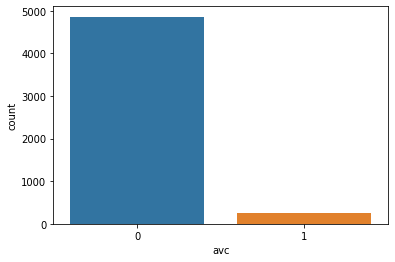

In [46]:
#Usando Countplot verifica que está desbalanceado
ax = sns.countplot(x=df2['avc'])

In [47]:
#Iniciando a análise de registros Outlier, primeiro pegando os dados para 'df_numeric'
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_numeric = df2.select_dtypes(include=numerics)
df_numeric

,genero,idade,hipertensao,doenca_cardiaca,casado,nivel_glicose,imc,tp_fumante,avc
0,2,67.0,0,1,1,228.69,36.60,1,1
1,1,61.0,0,0,1,202.21,45.75,2,1
2,2,80.0,0,1,1,105.92,32.50,2,1
3,1,49.0,0,0,1,171.23,34.40,3,1
4,1,79.0,1,0,1,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,83.75,45.75,2,0
5106,1,81.0,0,0,1,125.20,40.00,2,0
5107,1,35.0,0,0,1,82.99,30.60,2,0
5108,2,51.0,0,0,1,166.29,25.60,1,0


In [48]:
#Fazendo a cópia de df_numeric para atrib
atrib = df_numeric
atrib

,genero,idade,hipertensao,doenca_cardiaca,casado,nivel_glicose,imc,tp_fumante,avc
0,2,67.0,0,1,1,228.69,36.60,1,1
1,1,61.0,0,0,1,202.21,45.75,2,1
2,2,80.0,0,1,1,105.92,32.50,2,1
3,1,49.0,0,0,1,171.23,34.40,3,1
4,1,79.0,1,0,1,174.12,24.00,2,1
...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,1,83.75,45.75,2,0
5106,1,81.0,0,0,1,125.20,40.00,2,0
5107,1,35.0,0,0,1,82.99,30.60,2,0
5108,2,51.0,0,0,1,166.29,25.60,1,0


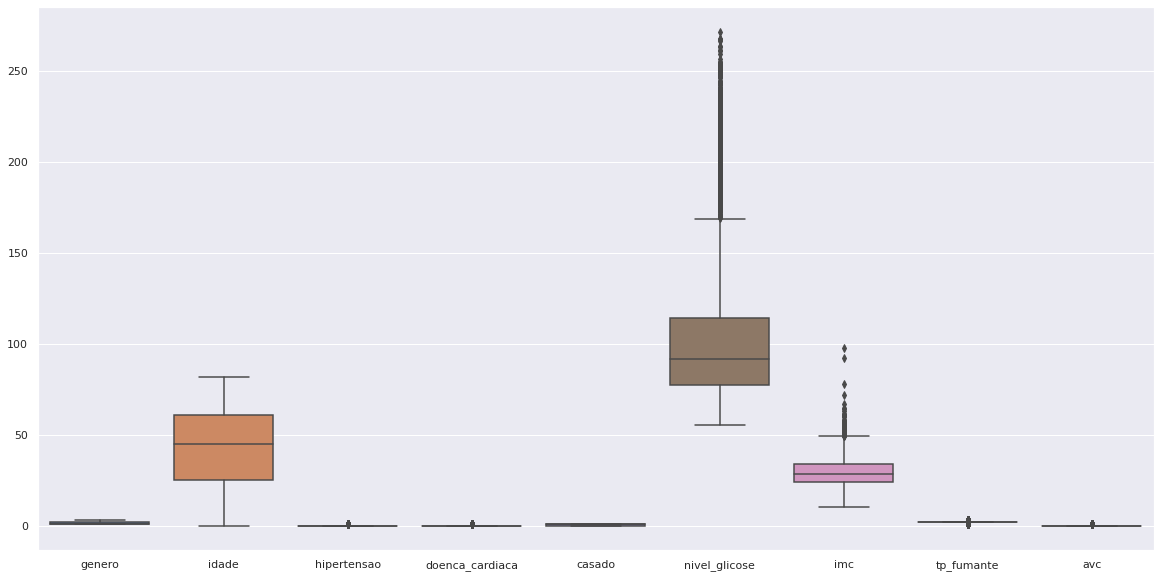

In [49]:
#E, usando o df_numeric, usar o recurso BoxPlot no qual será gerado as informações de referência de cada coluna
sns.set(rc={'figure.figsize': (20, 10)}) 
ax = sns.boxplot(data=df_numeric)

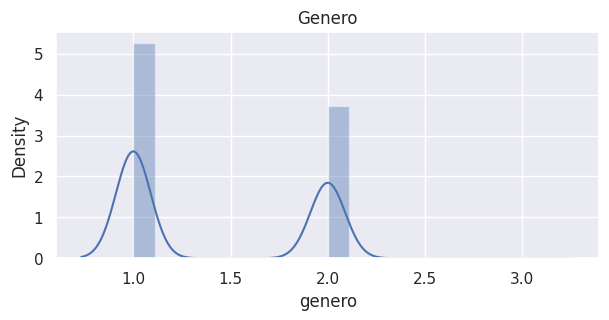

In [50]:
#Em cada coluna será feito a análise do Distplot e do Boxplot para verificar se terá registros Outlier
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df2['genero']).set_title('Genero')
plt.show()

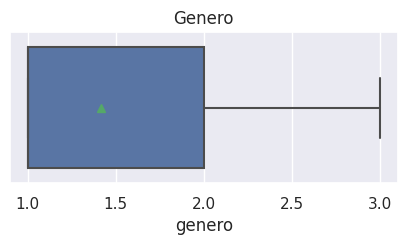

In [51]:
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df2['genero'],showmeans=True).set_title('Genero')

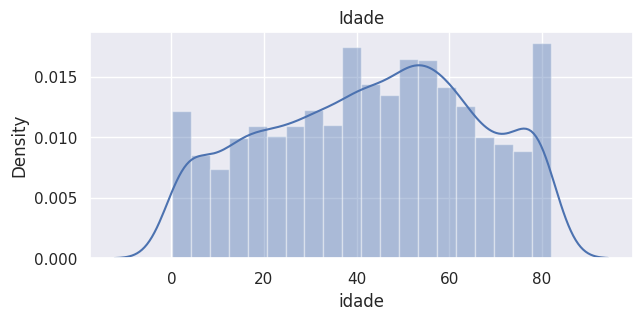

In [52]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df2['idade']).set_title('Idade')
plt.show()

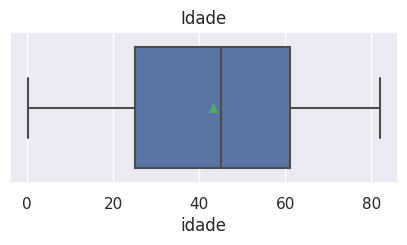

In [53]:
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df2['idade'],showmeans=True).set_title('Idade')

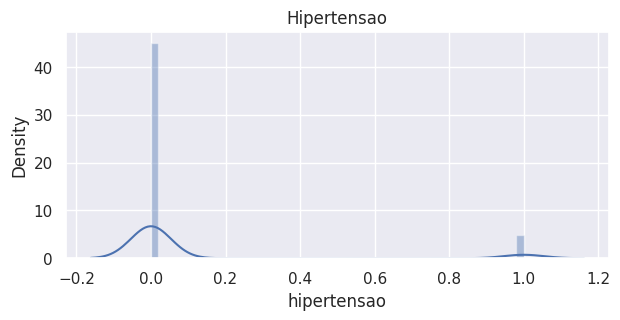

In [54]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df2['hipertensao']).set_title('Hipertensao')
plt.show()

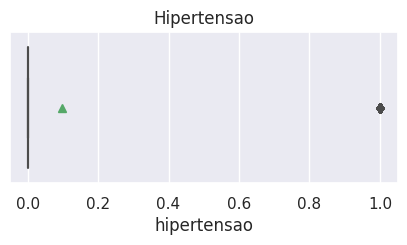

In [55]:
#Aqui aparece Outlier entretanto pode ignorar pois é utilizado apenas 0 e 1
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df2['hipertensao'],showmeans=True).set_title('Hipertensao')

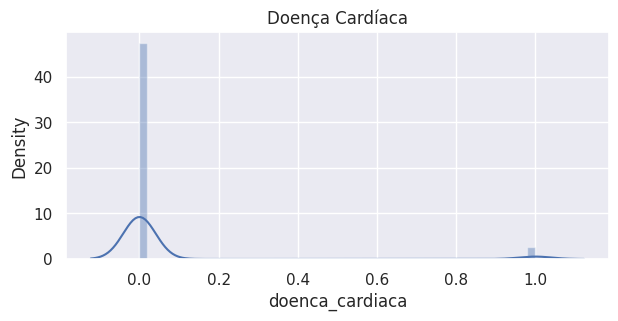

In [56]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df2['doenca_cardiaca']).set_title('Doença Cardíaca')
plt.show()

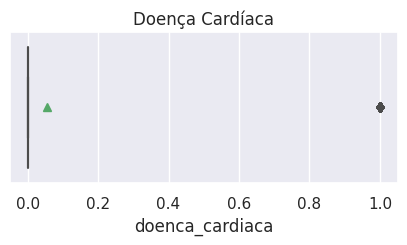

In [57]:
#Aqui aparece Outlier entretanto pode ignorar pois é utilizado apenas 0 e 1
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df2['doenca_cardiaca'],showmeans=True).set_title('Doença Cardíaca')

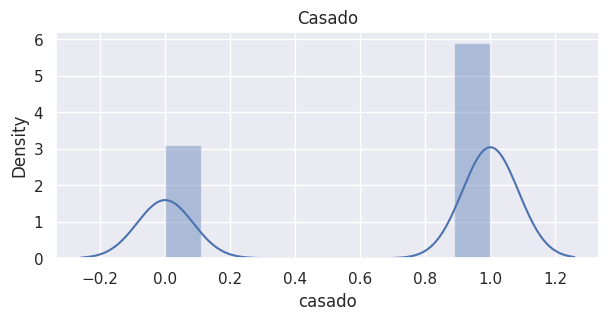

In [58]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df2['casado']).set_title('Casado')
plt.show()

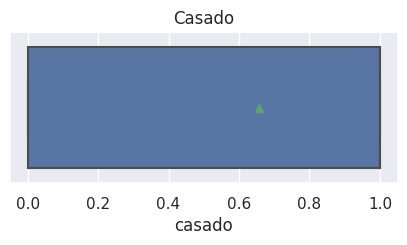

In [59]:
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df2['casado'],showmeans=True).set_title('Casado')

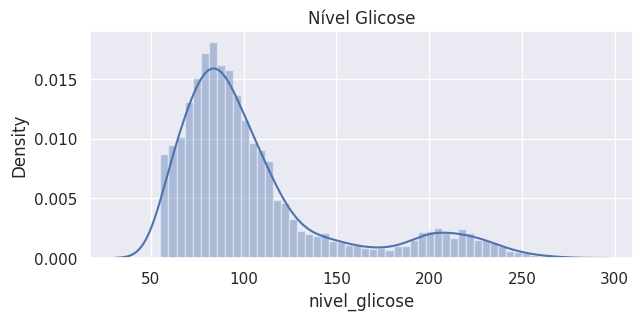

In [60]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df2['nivel_glicose']).set_title('Nível Glicose')
plt.show()

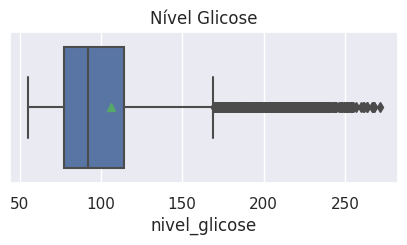

In [61]:
#Nesta situação tem registros Outlier que não seja 0 e 1, será feito tratamento mais pra frente
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df2['nivel_glicose'],showmeans=True).set_title('Nível Glicose')

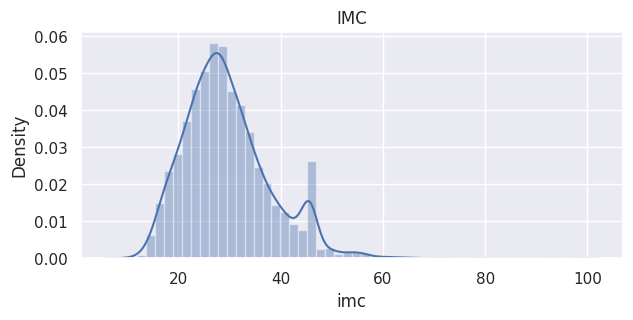

In [62]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df2['imc']).set_title('IMC')
plt.show()

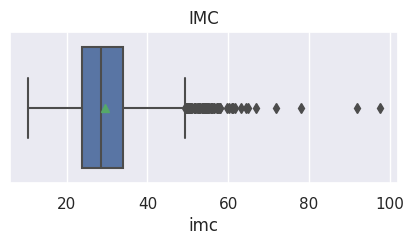

In [63]:
#Outra coluna que tem Outlier
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df2['imc'],showmeans=True).set_title('IMC')

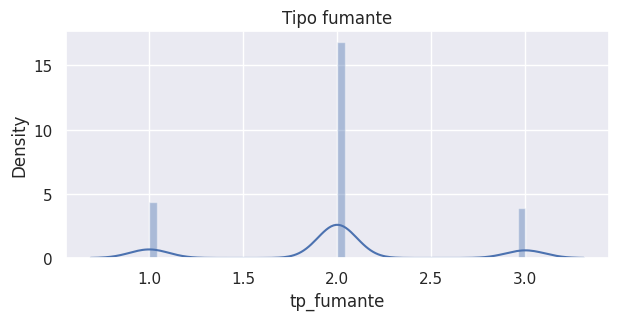

In [64]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df2['tp_fumante']).set_title('Tipo fumante')
plt.show()

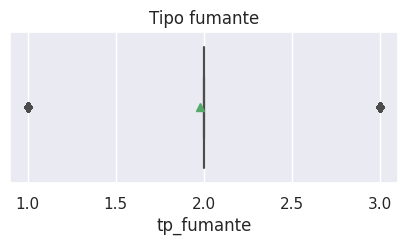

In [65]:
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df2['tp_fumante'],showmeans=True).set_title('Tipo fumante')

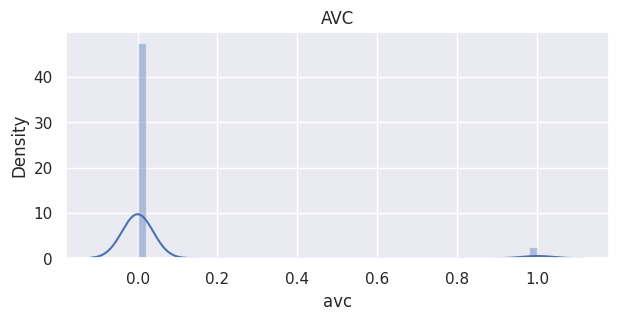

In [66]:
plt.figure(figsize=(7,3),dpi=100)
sns.distplot(df2['avc']).set_title('AVC')
plt.show()

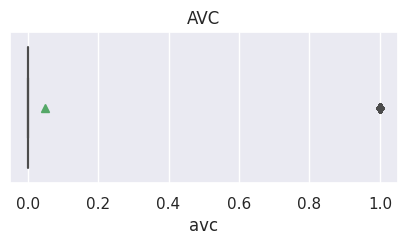

In [67]:
#Aqui aparece Outlier entretanto pode ignorar pois é utilizado apenas 0 e 1
plt.figure(figsize=(5,2),dpi=100)
ax = sns.boxplot(df2['avc'],showmeans=True).set_title('AVC')

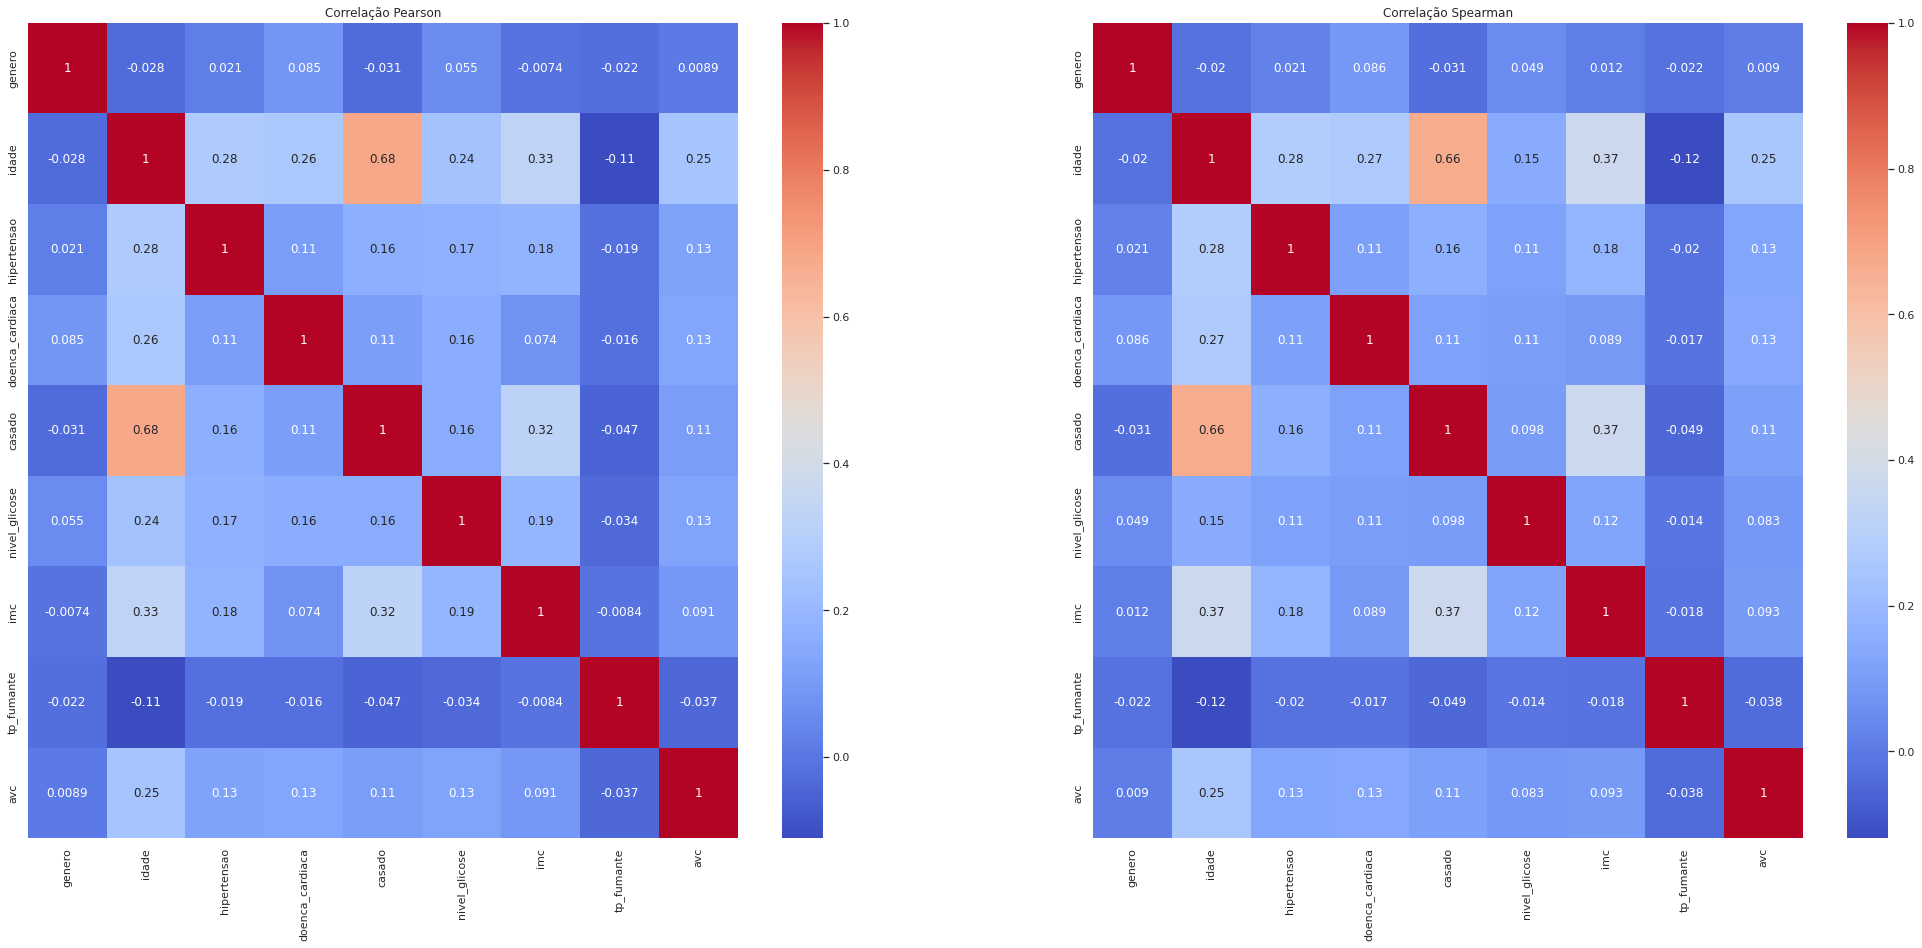

In [68]:
#Fazendo a Correlação Pearson e Spearman, verifique que apenas uma correlação tem um percentual aceitável
fig, ax = plt.subplots(1,2,figsize=(35,15))
g = sns.heatmap(df2.corr(method='pearson'), cmap='coolwarm', annot=True, ax=ax[0])
g.set_title('Correlação Pearson')
g2 = sns.heatmap(df2.corr(method='spearman'), cmap='coolwarm', annot=True, ax=ax[1])
g2.set_title('Correlação Spearman');

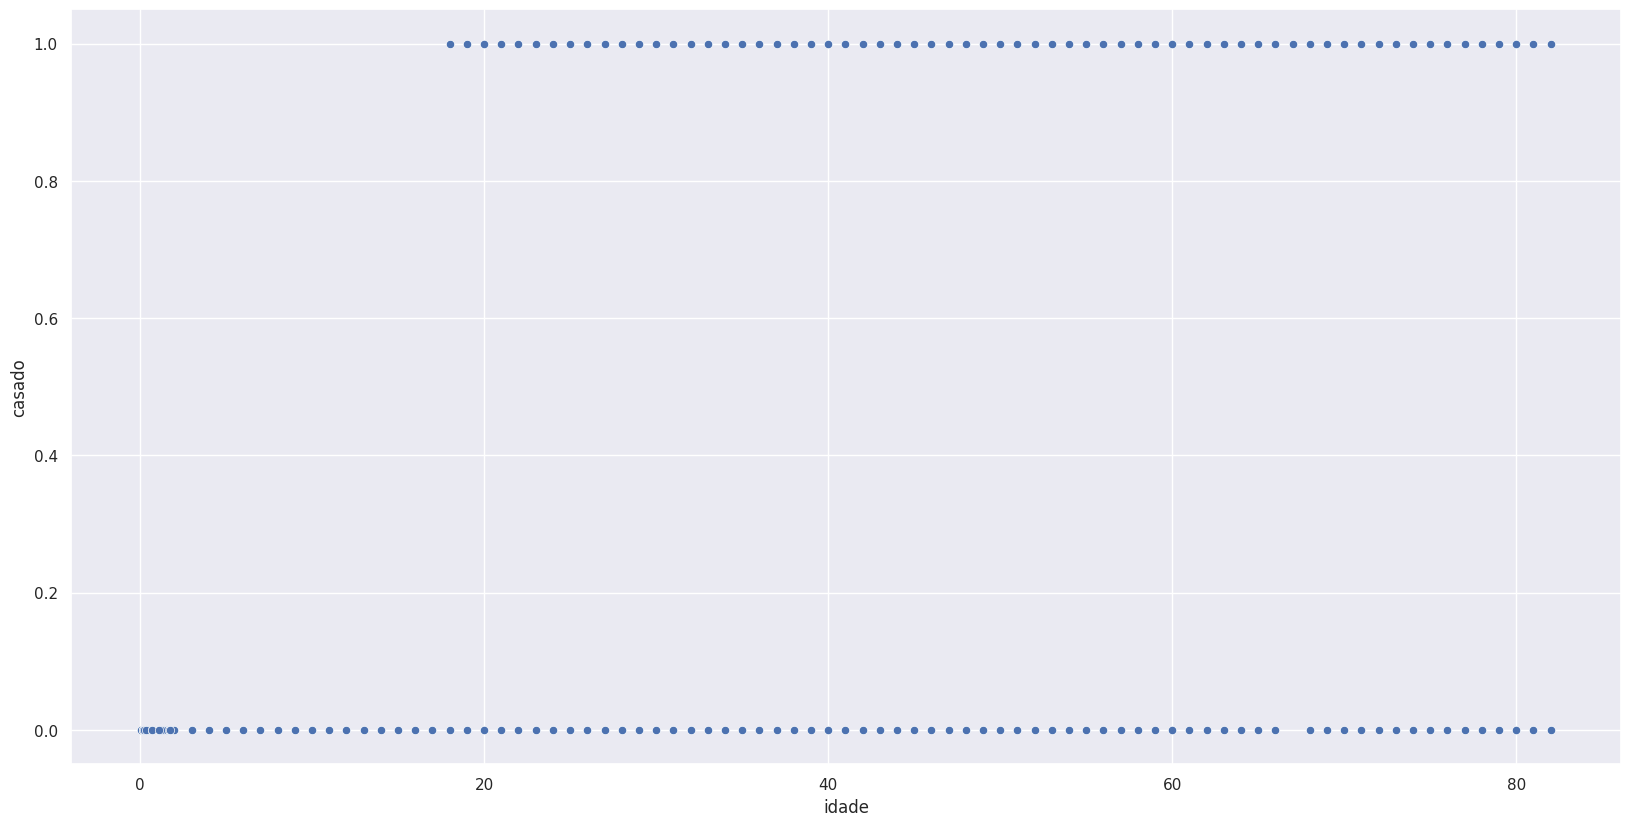

In [69]:
#Usando o Scatterplot é verificado a relação entre a única correlação
plt.figure(figsize=(20,10),dpi=100)
ax = sns.scatterplot(x='idade', y='casado', data=df2)

In [70]:
#Tratamento dos Outliers, inicialmente é puxado a média e o desvio padrão
media =sts.mean(df2['nivel_glicose'])
desv = sts.stdev(df2['nivel_glicose'])
print(media)
print(desv)

106.1476771037182
45.28356015058198


In [71]:
#Depois é analisado se tem algum registro abaixo da fronteira
df2.loc[df2['nivel_glicose'] <  media - 2 * desv] 

,genero,idade,hipertensao,doenca_cardiaca,casado,nivel_glicose,imc,tp_fumante,avc


In [72]:
#Se não tiver será analisado se tem registro acima da fronteira
df2.loc[df2['nivel_glicose'] > media +  2 * desv]  

,genero,idade,hipertensao,doenca_cardiaca,casado,nivel_glicose,imc,tp_fumante,avc
0,2,67.0,0,1,1,228.69,36.60,1,1
1,1,61.0,0,0,1,202.21,45.75,2,1
13,2,78.0,0,1,1,219.84,45.75,2,1
14,1,79.0,0,1,1,214.09,28.20,2,1
17,2,75.0,1,0,1,221.29,25.80,3,1
...,...,...,...,...,...,...,...,...,...
5029,1,72.0,0,0,1,206.49,26.30,2,0
5034,1,79.0,0,0,0,253.86,28.80,1,0
5035,1,78.0,0,0,1,203.36,28.70,1,0
5061,2,41.0,0,0,1,223.78,32.30,2,0


In [73]:
#Se tiver é feito a substituição dos registros para a mediana
mediana = sts.median(df2['nivel_glicose'])
df2.loc[df2['nivel_glicose'] > media +  2 * desv, 'nivel_glicose'] = mediana

In [74]:
#Depois repetir a última consulta para verificar se faltava registros
df2.loc[df2['nivel_glicose'] > media +  2 * desv ] 

,genero,idade,hipertensao,doenca_cardiaca,casado,nivel_glicose,imc,tp_fumante,avc


In [75]:
#Repetindo a mesma rotina mas com a coluna 'imc'
media =sts.mean(df2['imc'])
desv = sts.stdev(df2['imc'])
print(media)
print(desv)

29.5562915851272
8.36653417805613


In [76]:
#Neste exemplo tinha registros abaixo da fronteira
df2.loc[df2['imc'] <  media - 2 * desv] 

,genero,idade,hipertensao,doenca_cardiaca,casado,nivel_glicose,imc,tp_fumante,avc
657,1,4.00,0,0,0,107.25,12.0,2,0
922,1,8.00,0,0,0,106.51,12.3,2,0
1609,1,1.24,0,0,0,122.04,10.3,2,0
2187,2,40.00,0,0,1,60.96,11.5,2,0
3307,1,79.00,0,0,1,79.03,11.3,2,0
3319,1,1.08,0,0,0,159.39,12.8,2,0


In [77]:
#Sendo assim será feito a troca de registros abaixo da fronteira para mediana
mediana = sts.median(df2['imc'])
df2.loc[df2['imc'] < media -  2 * desv, 'imc'] = mediana

In [78]:
#Analise após a troca
df2.loc[df2['imc'] <  media - 2 * desv] 

,genero,idade,hipertensao,doenca_cardiaca,casado,nivel_glicose,imc,tp_fumante,avc


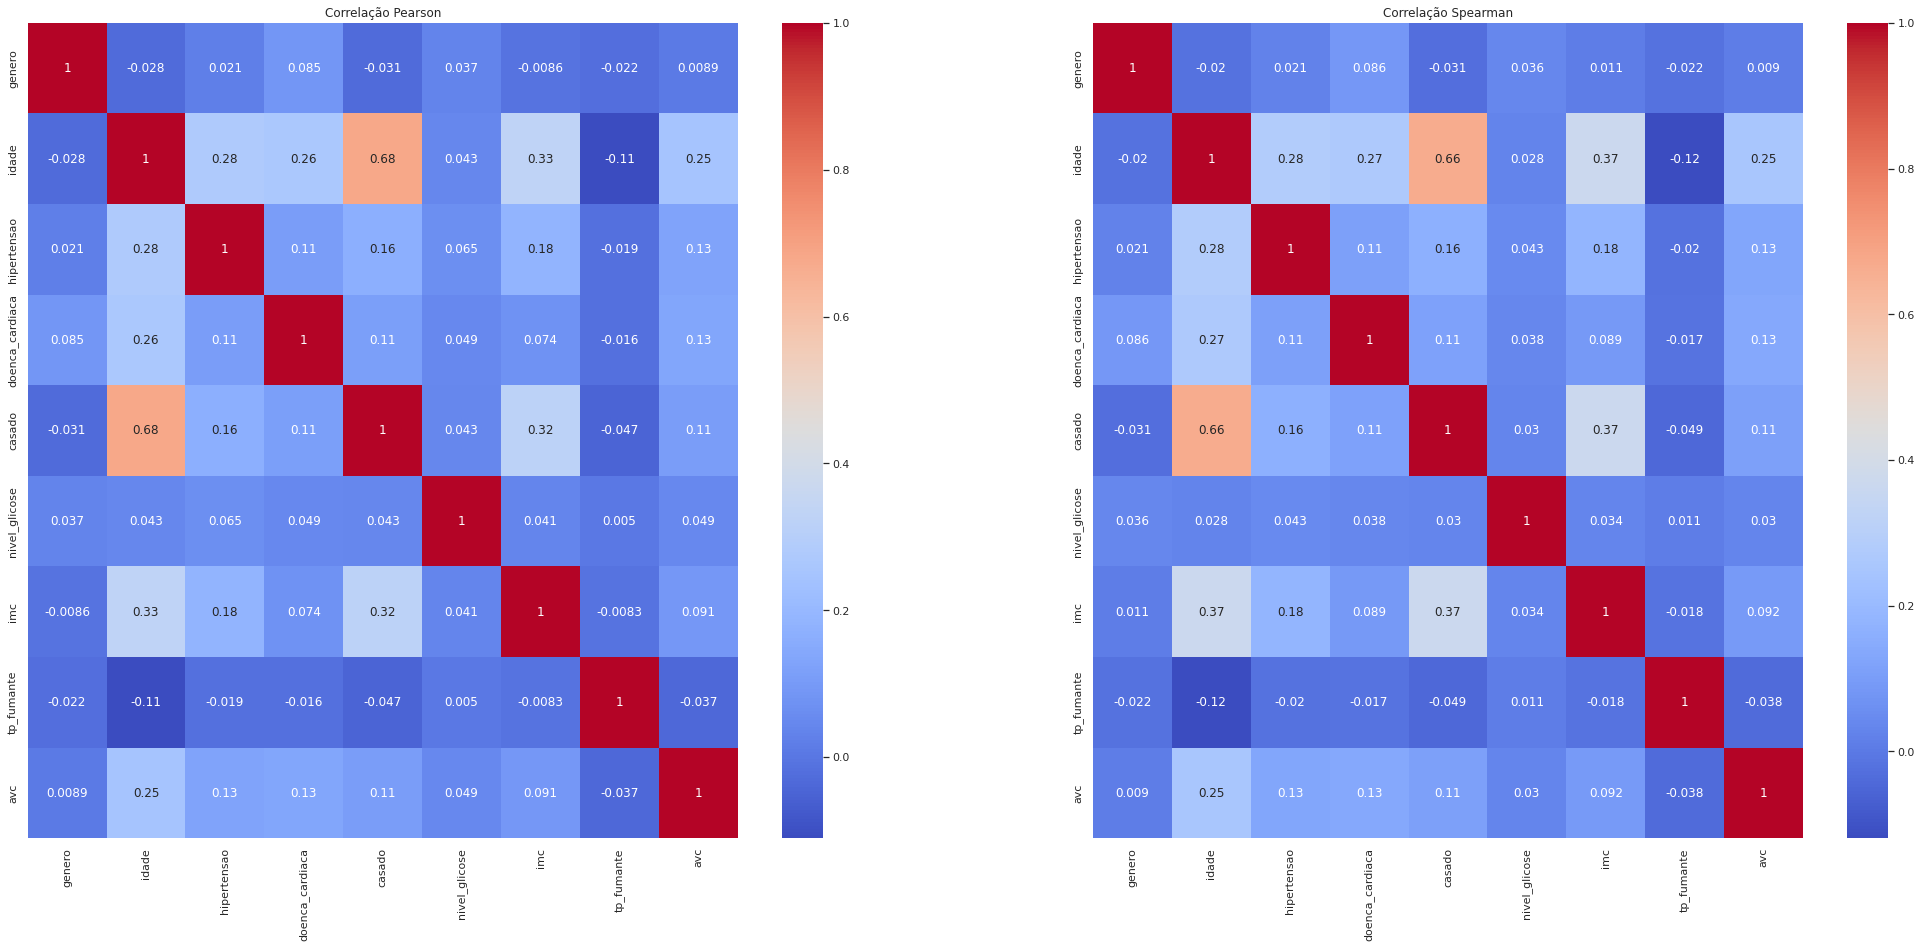

In [79]:
#Fazendo novamente a análise depois do tratamento para detectar outra correlação
fig, ax = plt.subplots(1,2,figsize=(35,15))
g = sns.heatmap(df2.corr(method='pearson'), cmap='coolwarm', annot=True, ax=ax[0])
g.set_title('Correlação Pearson')
g2 = sns.heatmap(df2.corr(method='spearman'), cmap='coolwarm', annot=True, ax=ax[1])
g2.set_title('Correlação Spearman');

In [80]:
#Terceiro Backup após o tratamento de Outliers
df3 = df2.copy()

In [81]:
#Agora será feito a rotina de balanceamento de dados
df3.avc.value_counts() 

0    4861
1     249
Name: avc, dtype: int64

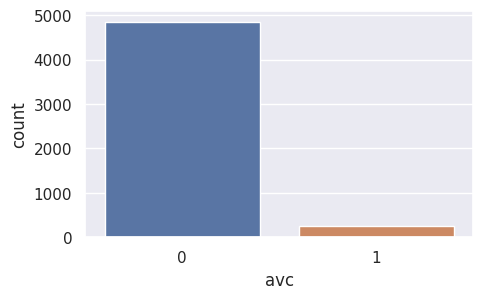

In [82]:
#Utilizando o CountPlot verifica o desbalanceamento
plt.figure(figsize=(5,3),dpi=100)
ax = sns.countplot(x="avc", data=df3)

In [83]:
#Iniciado rotina de Upsampling com o Sklearn pegando informações para teste e treino
df_teste = df3[5000:]
df_treino = df3[:5000]

X_teste = df_teste.drop('avc', axis = 1)
Y_teste = df_teste['avc']

In [84]:
#Separando o dataframe usando como base os atributos da coluna 'avc'
df_maior = df_treino[df_treino.avc==0]
df_menor = df_treino[df_treino.avc==1]

In [85]:
#Verificando a quantidade de linhas e colunas de cada
df_maior.shape, df_menor.shape

((4751, 9), (249, 9))

In [86]:
#Com o Resample será feito a adição dos registros para se igualar ao atributo maioritário
df_menor_upsample = resample(df_menor,
             replace=True,
             n_samples=len(df_maior),
             random_state=123)

In [87]:
#Com o Concat é feito a concatenação de ambos dataframes
df_upsampled = pd.concat([df_maior, df_menor_upsample])

0    4751
1    4751
Name: avc, dtype: int64


<AxesSubplot:ylabel='Type'>

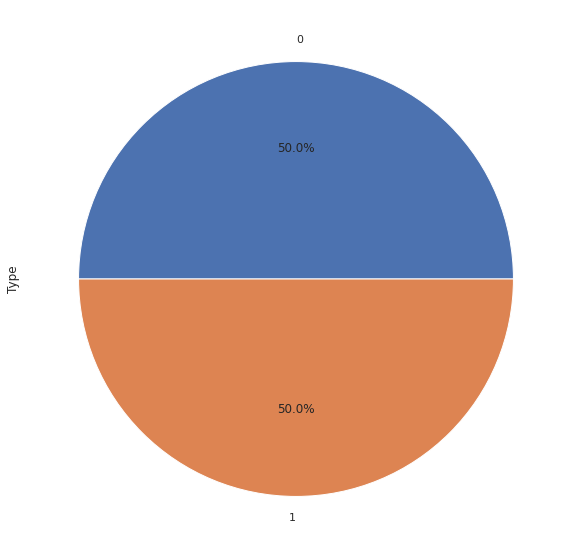

In [88]:
#Depois da concatenação analisado o banco de dados balanceado
print(df_upsampled["avc"].value_counts())

df_upsampled.groupby('avc').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [89]:
#Quarto backup com o novo banco
df4 = df_upsampled.copy()

In [90]:
#Agora com os dados tratados e balanceados será iniciada rotina de classificação do dataframe, iniciando com a separação dos dataframes
X = df4.drop('avc', axis=1)
y = df4['avc']

In [91]:
#Criado o objeto Scaler utilizando MinMaxScaler e depois transformar o dataframe novo
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [92]:
#Desenvolvido 4 novas variáveis que será usado nas ferramentas de classificação
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [93]:
#Exibindo a quantidade de registros de X_treino e X_teste
print(len(X_treino))
print(len(X_teste))

6651
2851


##**Primeira Classificação:** Logistic Regression


In [94]:
lr = LogisticRegression(random_state=42)

In [95]:
lr.fit(X_treino,y_treino)

LogisticRegression(random_state=42)

In [96]:
lr.score(X_teste, y_teste)

0.7748158540862855

In [97]:
lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                        intercept_scaling=1, max_iter=100, multi_class='ovr', 
                        n_jobs=1, penalty='l2', random_state=42, solver='liblinear', 
                        tol=0.0001, verbose=0, warm_start=False)

In [98]:
lr.fit(X_treino,y_treino)

LogisticRegression(multi_class='ovr', n_jobs=1, random_state=42,
                   solver='liblinear')

In [99]:
lr.score(X_teste, y_teste)

0.7744650999649246

**Validação Cruzada**

In [100]:
cv_scores = cross_val_score(lr,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.75289169 0.77497371 0.75789474 0.78       0.76210526 0.77368421
 0.79157895 0.78421053 0.78421053 0.78105263]
Média dos Scores = 0.7742602246942275


In [101]:
lr_previsoes = lr.predict(X_teste)
lr_previsoes

array([1, 1, 1, ..., 0, 1, 1])

In [102]:
lr_previsoes_prob = lr.predict_proba(X_teste)
lr_previsoes_prob

array([[0.24323017, 0.75676983],
       [0.44935452, 0.55064548],
       [0.347225  , 0.652775  ],
       ...,
       [0.83732753, 0.16267247],
       [0.32417402, 0.67582598],
       [0.400332  , 0.599668  ]])

**Matriz de Confusão**

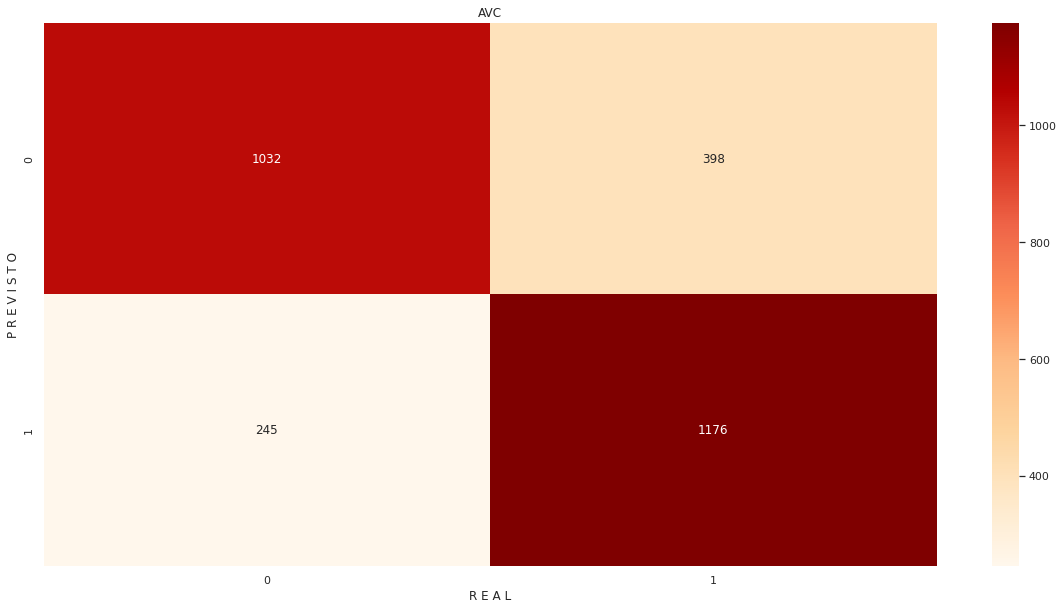

In [103]:
sns.heatmap(confusion_matrix(y_teste, lr_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('AVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [104]:
acuracia = accuracy_score(y_teste,lr_previsoes)
precisao = precision_score(y_teste,lr_previsoes, average='micro')
recall = recall_score(y_teste,lr_previsoes, average='micro')
f1Score = f1_score(y_teste,lr_previsoes, average='micro')
lr_curva_roc = roc_auc_score(y_teste,lr_previsoes)
kappa = cohen_kappa_score(y_teste,lr_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lr_curva_roc,2)}')

Acurácia:0.77
Precisão:0.77
Recall ou Sensibilidade:0.77
F1-Score:0.77
Kappa:0.55
Curva ROC:0.77


In [105]:
print(classification_report(y_teste, lr.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1430
           1       0.75      0.83      0.79      1421

    accuracy                           0.77      2851
   macro avg       0.78      0.77      0.77      2851
weighted avg       0.78      0.77      0.77      2851



**Curva ROC**

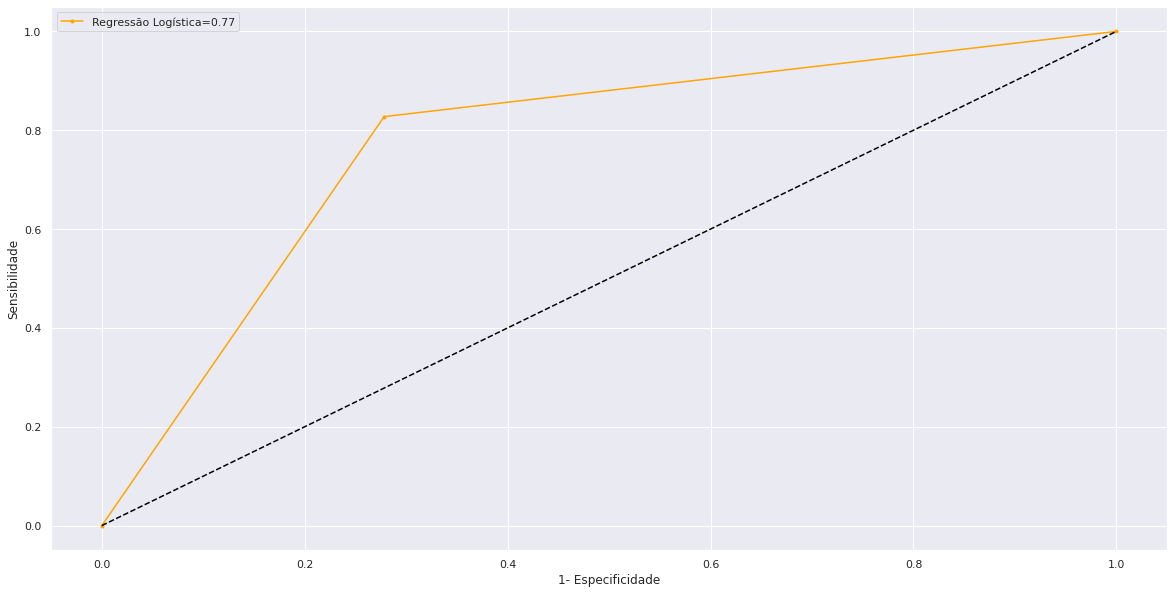

In [106]:
rl_fp,rl_vp,lim1 = roc_curve(y_teste, lr_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

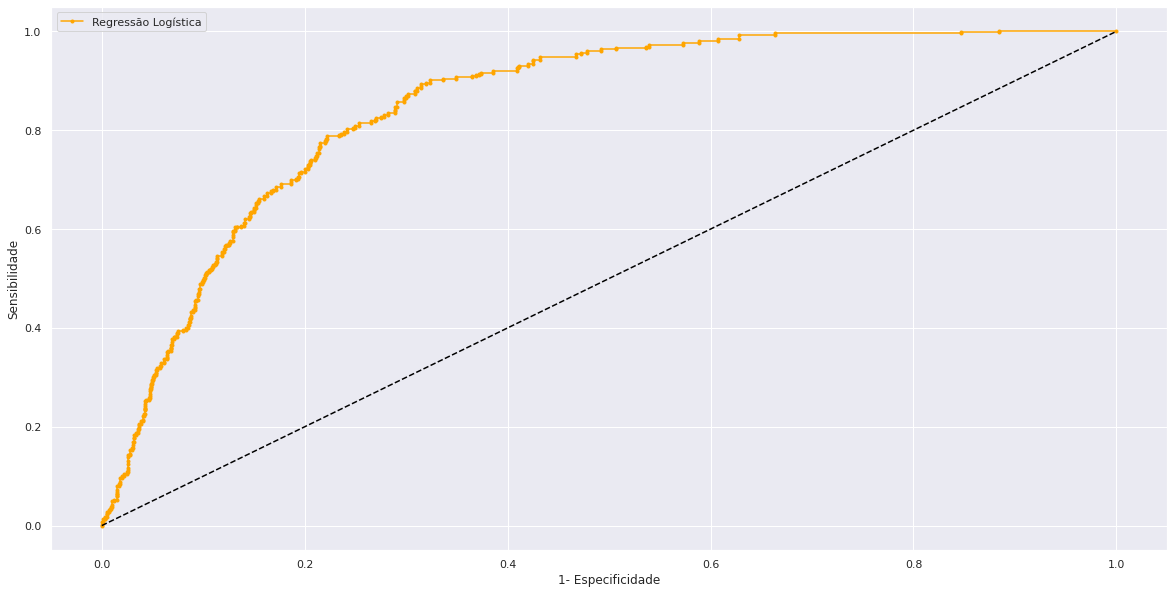

In [107]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística',color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [108]:
X_teste

,genero,idade,hipertensao,doenca_cardiaca,casado,nivel_glicose,imc,tp_fumante
8026,0.5,0.975586,0.0,0.0,1.0,0.346070,0.124113,0.5
4631,0.0,0.792480,0.0,0.0,1.0,0.284766,0.147754,1.0
7581,0.0,0.768066,0.0,0.0,1.0,0.259658,0.345154,0.0
5300,0.0,0.389648,0.0,0.0,1.0,0.148386,0.199764,1.0
6747,0.5,1.000000,0.0,1.0,1.0,0.259658,0.230496,0.5
...,...,...,...,...,...,...,...,...
8182,0.5,0.719238,0.0,0.0,1.0,0.394943,0.224586,0.0
8452,0.0,0.890137,1.0,0.0,1.0,0.953598,0.277778,0.5
3455,0.0,0.487305,0.0,0.0,0.0,0.218801,0.128842,0.5
5657,0.5,0.707031,0.0,0.0,1.0,0.951480,0.387116,0.5


In [109]:
lr_previsoes_1 = lr.predict(X_teste[:1])
lr_previsoes_1

array([1])

In [110]:
lr_previsoes_1 = lr.predict_proba(X_teste[:1])
lr_previsoes_1

array([[0.24323017, 0.75676983]])

## **Segunda Classificação:** SVM

In [111]:
svc = SVC(random_state=42, probability=True)

In [112]:
svc.fit(X_treino, y_treino)

SVC(probability=True, random_state=42)

In [113]:
svc.score(X_teste, y_teste)

0.7825324447562259

In [114]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', 
          degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=42, 
          shrinking=True, tol=0.001, verbose=False)

In [115]:
svc.fit(X_treino, y_treino)

SVC(gamma='auto', probability=True, random_state=42)

In [116]:
svc.score(X_teste, y_teste) 

0.7860399859698352

**Validação Cruzada**

In [117]:
cv_scores = cross_val_score(svc,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.76656151 0.78443743 0.76631579 0.79894737 0.77894737 0.77578947
 0.79263158 0.79473684 0.79368421 0.79263158]
Média dos Scores = 0.7844683159001604


In [118]:
svc_previsoes = svc.predict(X_teste)
svc_previsoes

array([1, 1, 1, ..., 0, 1, 1])

In [119]:
svc_previsoes_prob = svc.predict_proba(X_teste)
svc_previsoes_prob

array([[0.21439071, 0.78560929],
       [0.44370752, 0.55629248],
       [0.33594501, 0.66405499],
       ...,
       [0.82554146, 0.17445854],
       [0.32626754, 0.67373246],
       [0.35477879, 0.64522121]])

**Matriz de confusão**

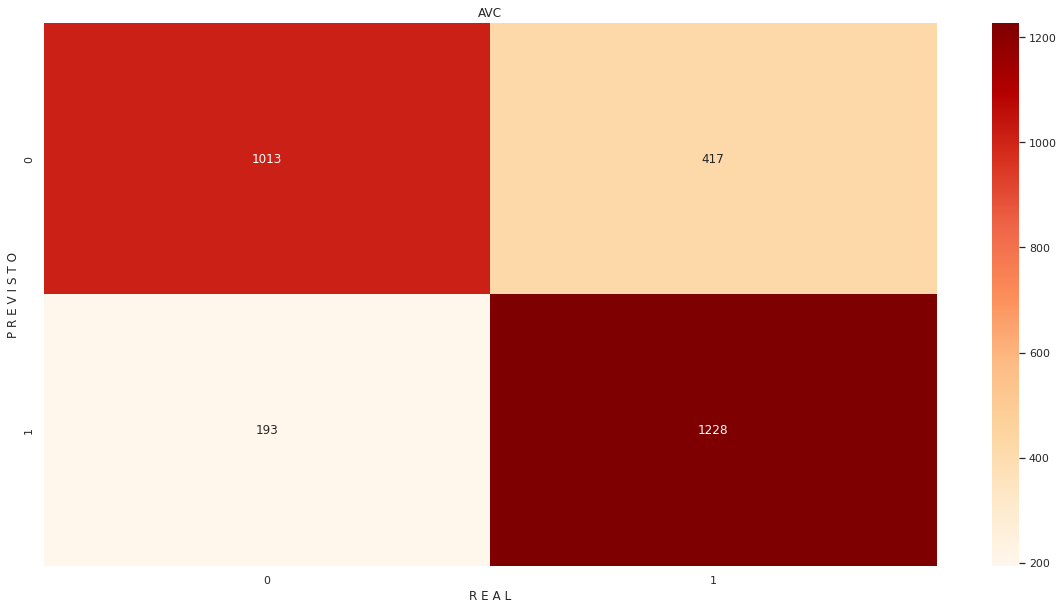

In [120]:
sns.heatmap(confusion_matrix(y_teste, svc_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('AVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [121]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,svc_previsoes)
precisao = precision_score(y_teste,svc_previsoes)
recall = recall_score(y_teste,svc_previsoes)
f1Score = f1_score(y_teste,svc_previsoes)
svc_curva_roc = roc_auc_score(y_teste,svc_previsoes)
kappa = cohen_kappa_score(y_teste,svc_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(svc_curva_roc,2)}')

Acurácia:0.79
Precisão:0.75
Recall ou Sensibilidade:0.86
F1-Score:0.8
Kappa:0.57
Curva ROC:0.79


In [122]:
print(classification_report(y_teste, svc.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1430
           1       0.75      0.86      0.80      1421

    accuracy                           0.79      2851
   macro avg       0.79      0.79      0.78      2851
weighted avg       0.79      0.79      0.78      2851



**Curva ROC**

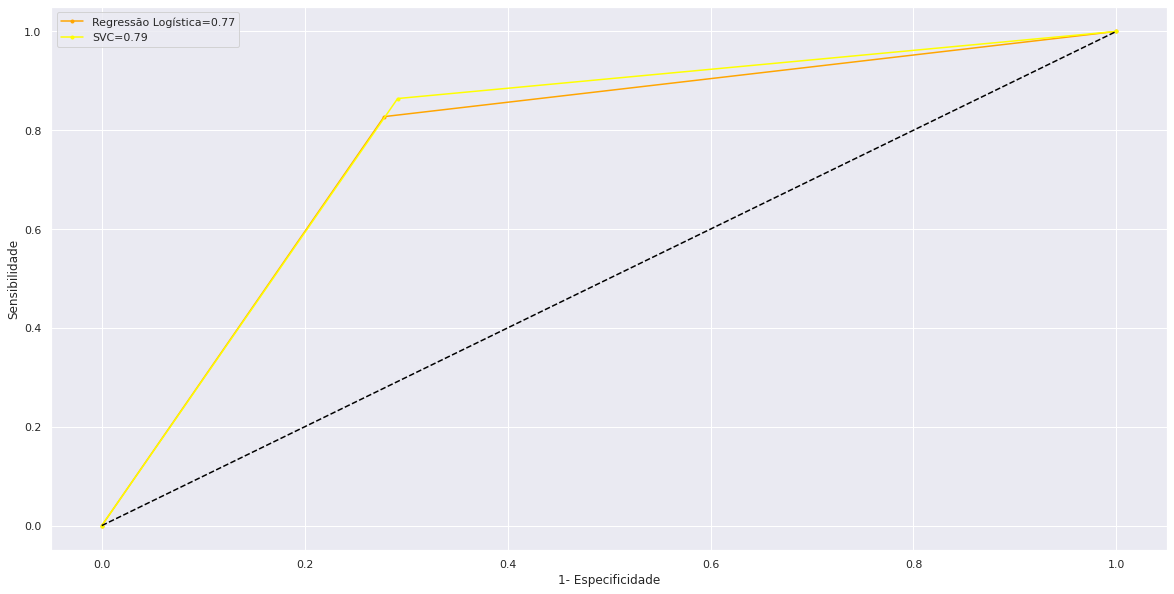

In [123]:
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_previsoes)
svc_fp,svc_vp,lim3 = roc_curve(y_teste,svc_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot(svc_fp,svc_vp, marker='.', label='SVC='+str(round(svc_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

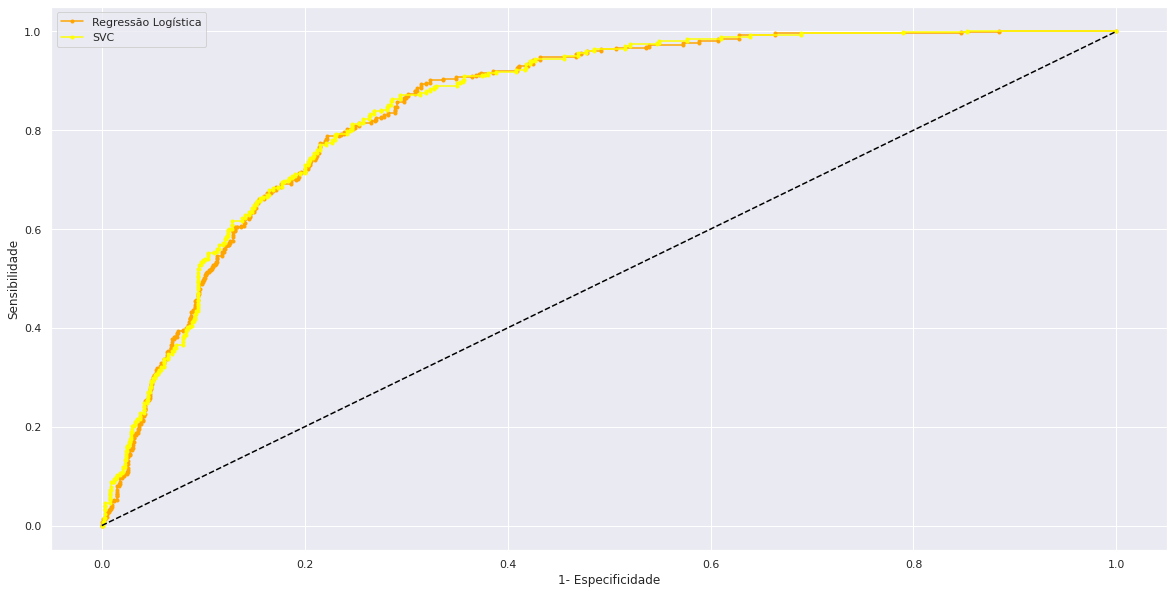

In [124]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
svc_probs = svc_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_probs)
svc_fp,svc_vp,lim3 = roc_curve(y_teste,svc_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística',color="orange")
plt.plot(svc_fp,svc_vp, marker='.', label='SVC',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

## **Terceira Classificação:** Random Forest

In [125]:
rf = RandomForestClassifier(random_state=42)

In [126]:
rf.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [127]:
rf.score(X_teste, y_teste)

0.9849175727814802

In [128]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, 
                            min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, 
                            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [129]:
rf.fit(X_treino, y_treino)

RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=1,
                       random_state=42)

In [130]:
rf.score(X_teste, y_teste) 

0.9842160645387583

**Validação cruzada**

In [131]:
cv_scores = cross_val_score(rf,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.9873817  0.99053628 0.98631579 0.99578947 0.98315789 0.98947368
 0.98842105 0.99473684 0.99368421 0.98736842]
Média dos Scores = 0.9896865349493608


In [132]:
rf_previsoes = rf.predict(X_teste)
rf_previsoes

array([1, 0, 1, ..., 0, 1, 1])

In [133]:
rf_previsoes_prob = rf.predict_proba(X_teste)
rf_previsoes_prob

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

**Matriz de Confusão**

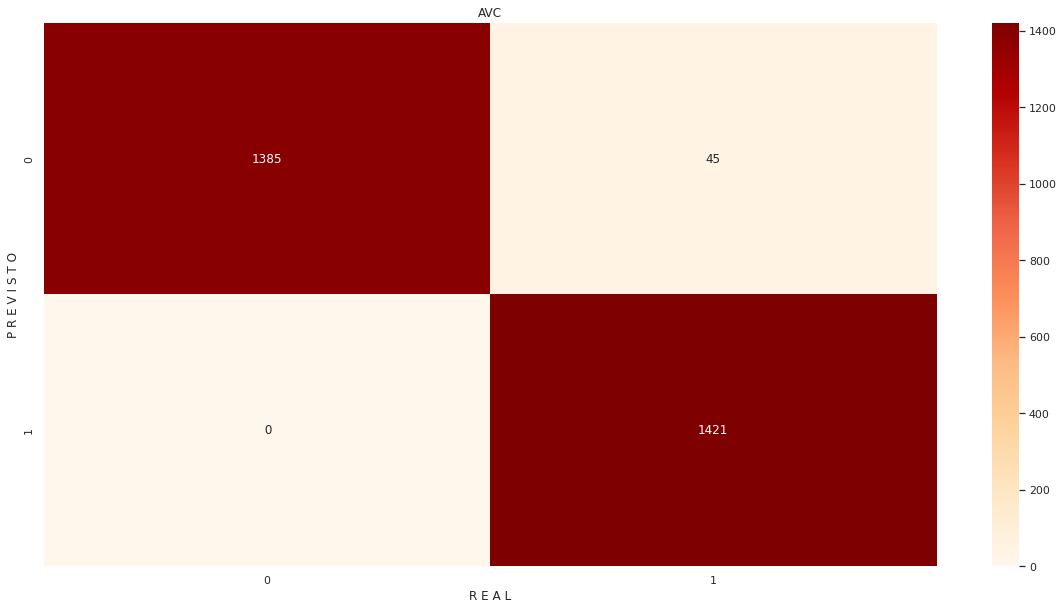

In [134]:
sns.heatmap(confusion_matrix(y_teste, rf_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('AVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [136]:
acuracia = accuracy_score(y_teste,rf_previsoes)
precisao = precision_score(y_teste,rf_previsoes)
recall = recall_score(y_teste,rf_previsoes)
f1Score = f1_score(y_teste,rf_previsoes)
rf_curva_roc = roc_auc_score(y_teste,rf_previsoes)
kappa = cohen_kappa_score(y_teste,rf_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Acurácia:0.98
Precisão:0.97
Recall ou Sensibilidade:1.0
F1-Score:0.98
Kappa:0.97
Curva ROC:0.98


In [137]:
print(classification_report(y_teste, rf.predict(X_teste)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1430
           1       0.97      1.00      0.98      1421

    accuracy                           0.98      2851
   macro avg       0.98      0.98      0.98      2851
weighted avg       0.98      0.98      0.98      2851



**Curva ROC**

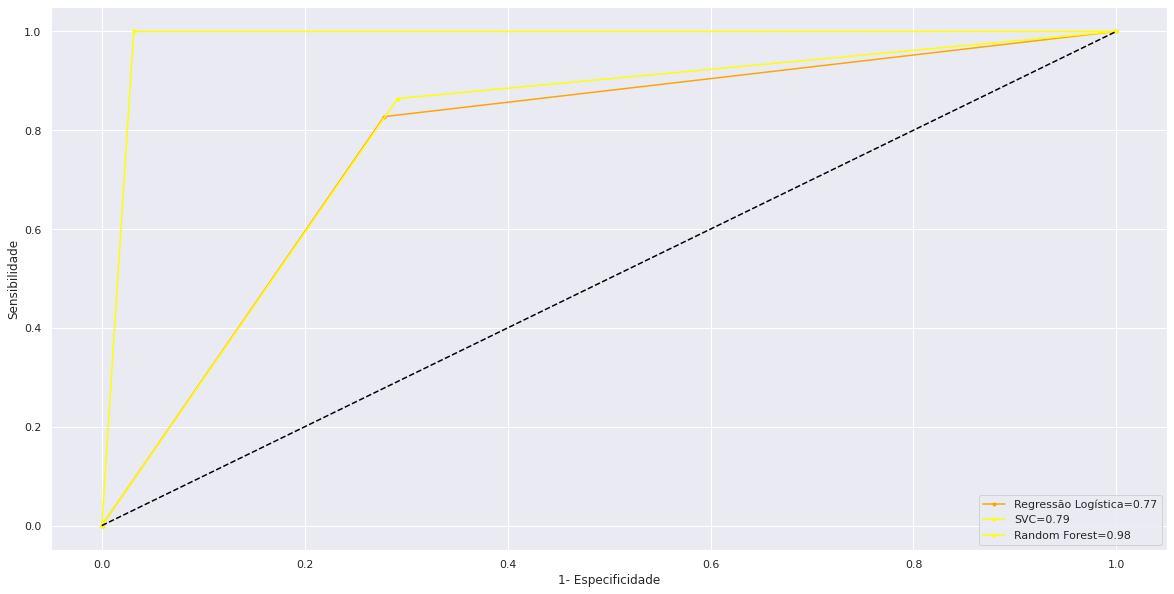

In [138]:
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_previsoes)
svc_fp,svc_vp,lim3 = roc_curve(y_teste,svc_previsoes)
rf_fp,rf_vp,lim3 = roc_curve(y_teste,rf_previsoes)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística='+str(round(lr_curva_roc,2)),color="orange")
plt.plot(svc_fp,svc_vp, marker='.', label='SVC='+str(round(svc_curva_roc,2)),color="yellow")
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest='+str(round(rf_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

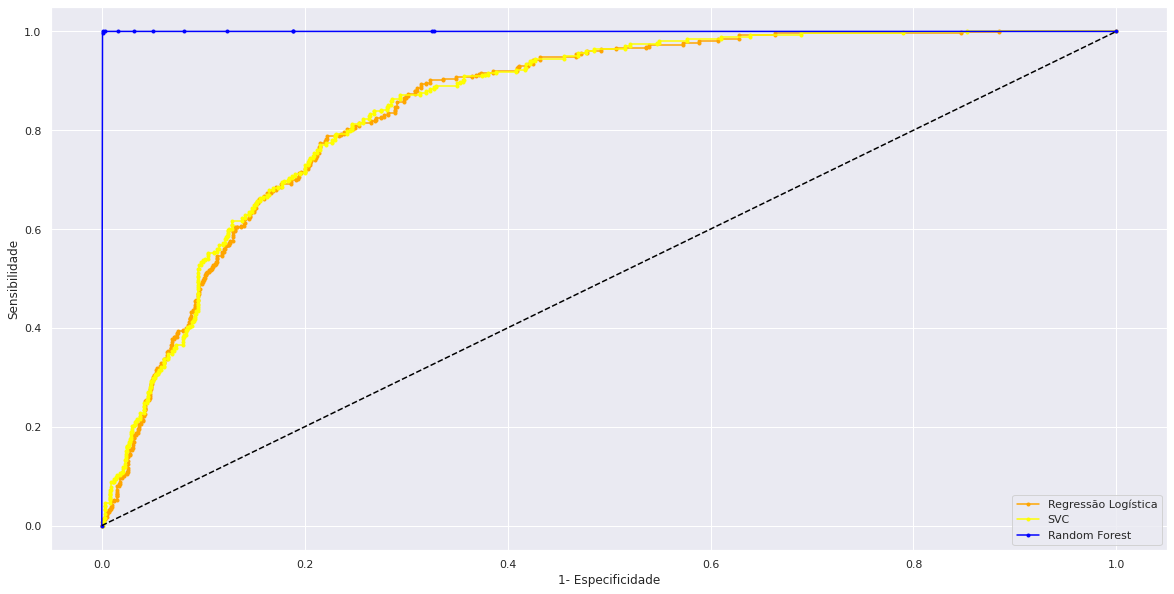

In [139]:
#Aqui estamos pegando apenas da classe 1
lr_probs = lr_previsoes_prob[:,1]
svc_probs = svc_previsoes_prob[:,1]
rf_probs = rf_previsoes_prob[:,1]
rl_fp,rl_vp,lim1 = roc_curve(y_teste,lr_probs)
svc_fp,svc_vp,lim3 = roc_curve(y_teste,svc_probs)
rf_fp,rf_vp,lim3 = roc_curve(y_teste,rf_probs)
plt.plot(rl_fp,rl_vp, marker='.', label='Regressão Logística',color="orange")
plt.plot(svc_fp,svc_vp, marker='.', label='SVC',color="yellow")
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest',color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [140]:
rf_previsoes_1 = rf.predict(X_teste[:1])
rf_previsoes_1

array([1])

In [141]:
rf_previsoes_1 = rf.predict_proba(X_teste[:1])
rf_previsoes_1

array([[0., 1.]])

Usando por intermédio destes 3 classificadores o melhor foi **Random Forest** com **98,42%**